In [45]:
!pip install ffmpeg

import pathlib
import sys

sys.path.append("../")

local_path = pathlib.Path().resolve()

  Using cached ffmpeg-1.4.tar.gz (5.1 kB)
Using legacy 'setup.py install' for ffmpeg, since package 'wheel' is not installed.
    Running setup.py install for ffmpeg: started
    Running setup.py install for ffmpeg: finished with status 'done'


You should consider upgrading via the 'c:\users\nielsota\code\statespace\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
from typing import List, Optional, Dict, Tuple
from scipy.optimize import minimize
from collections import deque

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from utils import _initiate_variables, _map_vector_to_matrices, _get_nan_positions, _remove_nan_tensor, _remove_inf_tensor, _get_bounds, read_target_from_path
from StateSpacingKalman import KalmanV1
from StateSpacingProtocols import KalmanProtocol, MathProtocol
from StateSpacingClasses import LinearGaussianModel_v2_numpy as LGM
from StateSpacingClasses import LLM_v1_numpy as LLM

In [32]:
dtype=np.float64
base_dir = pathlib.Path().resolve().parent
data_dir = base_dir / 'data'
nile_path = data_dir / 'Nile.txt'

# get data into shape [s, 1, n]
y = read_target_from_path(nile_path, dtype, header='infer')
y[:, :, 20:40] = np.nan

# Declare State Matrices Local Level Model -> use [[]] for extra dimension
T = np.array([[1]]).astype(dtype)
Z = np.array([[1]]).astype(dtype)
R = np.array([[1]]).astype(dtype)
Q = np.array([[1]]).astype(dtype)
H = np.array([[1]]).astype(dtype)
diffuse = True

dict_param_llm = {
    0: {"matrix" : "Q", "index": (0, 0, 0), "constant": True, "bounds": (0.1, None)},
    1:  {"matrix" : "H", "index": (0, 0, 0), "constant": True, "bounds": (0.1, None)}
}

filter_map = {0: "level"}

llm = LGM(y, T, Z, R, Q, H, diffuse, dict_param_llm, filter_map)
llm.fit()

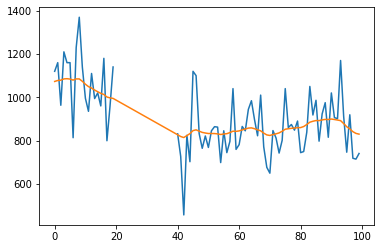

In [8]:
plt.plot(np.squeeze(y))
plt.plot(np.squeeze(llm.a_hat))

MovieWriter imagemagick unavailable; using Pillow instead.


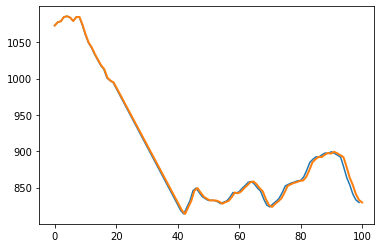

In [31]:
from matplotlib.animation import FuncAnimation

fig, axs = plt.subplots()
axs.plot(np.squeeze(y))
line, = axs.plot([], [], lw=2)
a_hat = np.squeeze(llm.a_hat)
# lists to store x and y axis points 
xdata, ydata = [], [] 
x = np.linspace(0, 100, 100)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    xdata.append(x[i])
    y = a_hat[i]
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=50, blit=True)

anim.save('smoothing.gif', writer='imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.


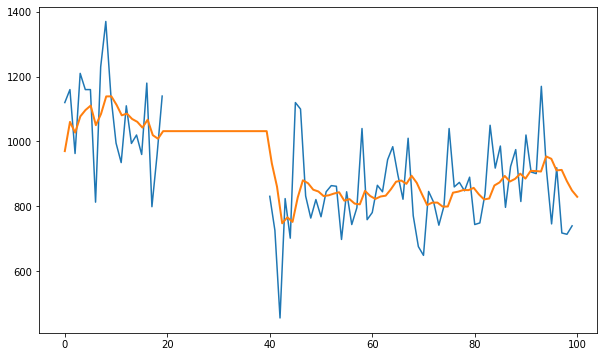

In [52]:
from matplotlib.animation import FuncAnimation

fig, axs = plt.subplots(figsize=(10,6))
axs.plot(np.squeeze(y))
line, = axs.plot([], [], lw=2)
att = np.squeeze(llm.att)
# lists to store x and y axis points 
xdata, ydata = [], [] 
x = np.linspace(0, 100, 100)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    xdata.append(x[i])
    y = att[i]
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=75, blit=True, repeat_delay=10000)

anim.save('filter.gif', writer='imagemagick')

MovieWriter ffmpeg unavailable; using Pillow instead.


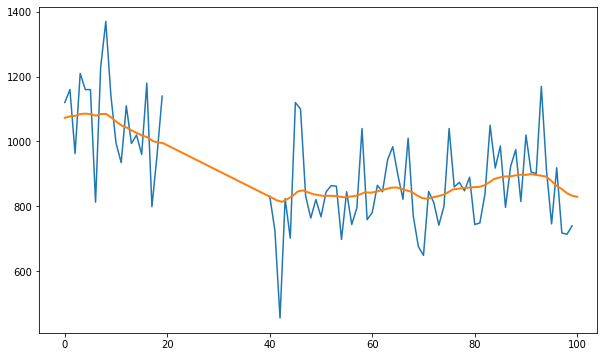

In [50]:
from matplotlib.animation import FuncAnimation

fig, axs = plt.subplots(figsize=(10,6))
axs.plot(np.squeeze(y))

line, = axs.plot([], [], lw=2)
a_hat = list(np.squeeze(llm.a_hat))

# lists to store x and y axis points 
xdata = list(np.linspace(0, 100, 100))
ydata = list(np.squeeze(llm.att))

# initialization function: plot the background of each frame
def init():
    line.set_data(xdata, ydata)
    return line,

# animation function.  This is called sequentially
def animate(i):
    xdata = list(np.linspace(0, 100, 100))
    ydata[100-1-i] = a_hat[100-1-i]
    line.set_data(xdata, ydata)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=75, blit=True, repeat_delay=10000)
anim.save('smoothing.gif')

In [55]:
llm.a

array([[[   0.        ,  970.33616282, 1060.42107723, 1027.37835033,
         1077.42156473, 1097.07416103, 1110.69566291, 1050.25382412,
         1085.19745697, 1138.95893629, 1139.15157496, 1112.83567429,
         1080.66617013, 1085.93973371, 1069.48019024, 1060.64708198,
         1042.71422759, 1067.14343896, 1019.47079381, 1008.54853317,
         1031.89570844, 1031.89570844, 1031.89570844, 1031.89570844,
         1031.89570844, 1031.89570844, 1031.89570844, 1031.89570844,
         1031.89570844, 1031.89570844, 1031.89570844, 1031.89570844,
         1031.89570844, 1031.89570844, 1031.89570844, 1031.89570844,
         1031.89570844, 1031.89570844, 1031.89570844, 1031.89570844,
         1031.89570844,  932.37875916,  860.56677915,  747.84280299,
          766.17003012,  752.17451026,  827.23562163,  880.44553771,
          871.27920924,  851.39680257,  845.84169825,  831.75033675,
          834.13349902,  839.48213815,  843.50288816,  817.57387547,
          822.45469902,  808.50543

In [54]:
llm.y

array([[[1120., 1160.,  963., 1210., 1160., 1160.,  813., 1230., 1370.,
         1140.,  995.,  935., 1110.,  994., 1020.,  960., 1180.,  799.,
          958., 1140.,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
           nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
           nan,   nan,   nan,   nan,  831.,  726.,  456.,  824.,  702.,
         1120., 1100.,  832.,  764.,  821.,  768.,  845.,  864.,  862.,
          698.,  845.,  744.,  796., 1040.,  759.,  781.,  865.,  845.,
          944.,  984.,  897.,  822., 1010.,  771.,  676.,  649.,  846.,
          812.,  742.,  801., 1040.,  860.,  874.,  848.,  890.,  744.,
          749.,  838., 1050.,  918.,  986.,  797.,  923.,  975.,  815.,
         1020.,  906.,  901., 1170.,  912.,  746.,  919.,  718.,  714.,
          740.]]])

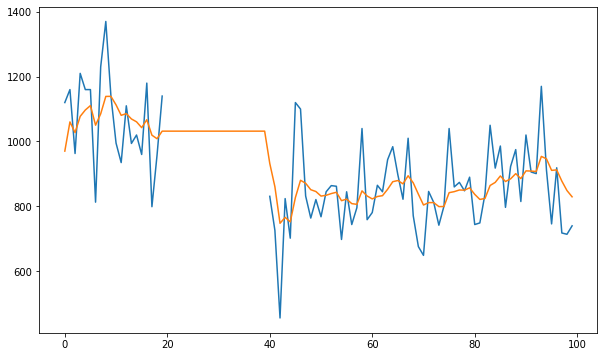

In [57]:
fig, axs = plt.subplots(figsize=(10,6))
axs.plot(np.squeeze(y))
axs.plot(np.squeeze(att))
fig.savefig('filter_end.png')

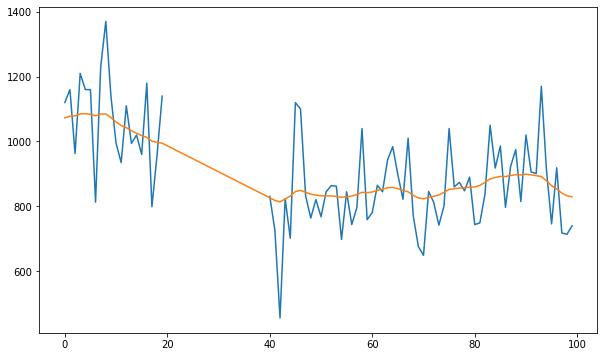

In [58]:
fig, axs = plt.subplots(figsize=(10,6))
axs.plot(np.squeeze(y))
axs.plot(np.squeeze(a_hat))
fig.savefig('smoother_end.png')